In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.metrics as sk

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data["total_rooms_per_house"] = data["total_rooms"] / data["households"]
data["total_bedrooms_per_house"] = data["total_bedrooms"] / data["households"]
data["population_per_house"] = data["population"] / data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_house,total_bedrooms_per_house,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20637 non-null float64
total_rooms                 20633 non-null float64
total_bedrooms              20433 non-null float64
population                  20637 non-null float64
households                  20636 non-null float64
median_income               20640 non-null float64
median_house_value          20635 non-null float64
ocean_proximity             20640 non-null object
total_rooms_per_house       20629 non-null float64
total_bedrooms_per_house    20429 non-null float64
population_per_house        20633 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


## No missing values in categorical feature

In [5]:
data.columns[data.isnull().any()].tolist()

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_house_value',
 'total_rooms_per_house',
 'total_bedrooms_per_house',
 'population_per_house']

## Detecting Outliers

In [6]:
cols = data.columns
cols = cols.drop(['latitude', 'longitude', 'ocean_proximity'])
for col in cols:
    Q3, Q1 = np.percentile(data.loc[:, col], [75, 25])
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5* IQR
    lower_fence = Q1 - 1.5*IQR
    
    #Impute the Outliers with NaN
    data.loc[data[col] < lower_fence, col] = np.nan
    data.loc[data[col] > upper_fence, col] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20637 non-null float64
total_rooms                 20633 non-null float64
total_bedrooms              20433 non-null float64
population                  20637 non-null float64
households                  20636 non-null float64
median_income               19959 non-null float64
median_house_value          20635 non-null float64
ocean_proximity             20640 non-null object
total_rooms_per_house       20629 non-null float64
total_bedrooms_per_house    20429 non-null float64
population_per_house        20633 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


## Impute the missing values 

In [7]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            3
total_rooms                   7
total_bedrooms              207
population                    3
households                    4
median_income               681
median_house_value            5
ocean_proximity               0
total_rooms_per_house        11
total_bedrooms_per_house    211
population_per_house          7
dtype: int64

In [8]:
missing_cols = data.columns[data.isnull().any()].tolist()

In [9]:
u_data = data
for cols in missing_cols:
    u_data[cols] = u_data[cols].fillna(u_data[cols].median())

In [10]:
u_data.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
total_rooms_per_house       0
total_bedrooms_per_house    0
population_per_house        0
dtype: int64

In [11]:
data = u_data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_house,total_bedrooms_per_house,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4698,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,3.4698,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [12]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
data = pd.get_dummies(data, columns = ["ocean_proximity"], drop_first = True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_house,total_bedrooms_per_house,population_per_house,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4698,452600.0,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,3.4698,358500.0,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0


In [14]:
feat_data = data.drop("median_house_value", axis=1)
feat_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_house,total_bedrooms_per_house,population_per_house,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.4698,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,3.4698,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,1.081081,2.181467,0,0,1,0


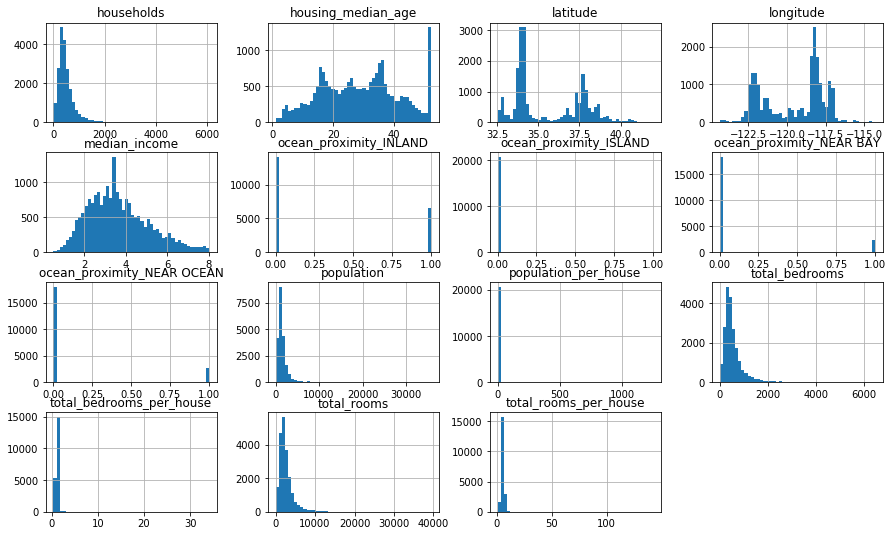

In [15]:
feat_data.hist(bins=50, figsize=(15,9))
plt.show()

### The features does not follow Gaussian distribution (except "ocean_proximity_NEAR OCEAN"), hence Normalisation is a better idea than Standarisation

## Normalisation

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Normalising Feature Data
norm = MinMaxScaler().fit(feat_data)
feat_data_norm = norm.transform(feat_data)
feat_data_norm = pd.DataFrame(feat_data_norm, columns =  feat_data.columns, index = feat_data.index)
feat_data_norm.head()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_house,total_bedrooms_per_house,population_per_house,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.395386,0.043512,0.020469,0.001499,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.395386,0.038224,0.018929,0.001141,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.899633,0.052756,0.021940,0.001698,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.684719,0.035241,0.021929,0.001493,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.445496,0.038534,0.022166,0.001198,0.0,0.0,1.0,0.0


## Visualising the correlation

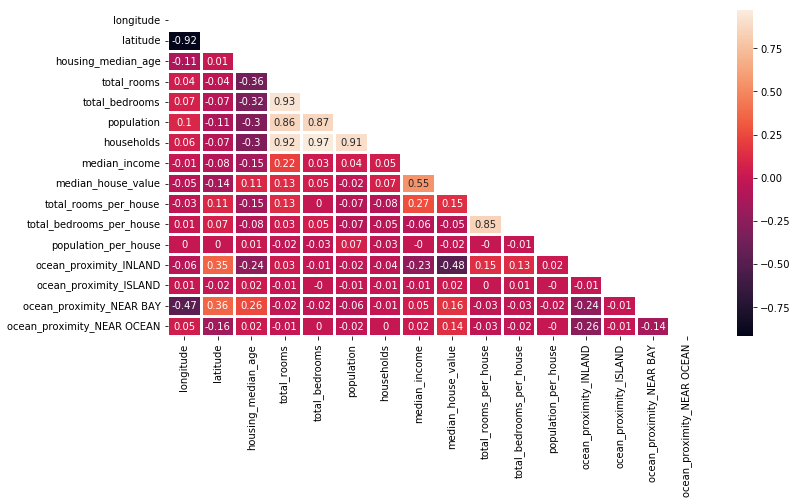

In [17]:
mat = data.corr().round(2)
mask = np.zeros_like(mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(12,6))
sns.heatmap(mat, mask = mask, cmap='rocket', linewidth=2, annot=True)
plt.show()

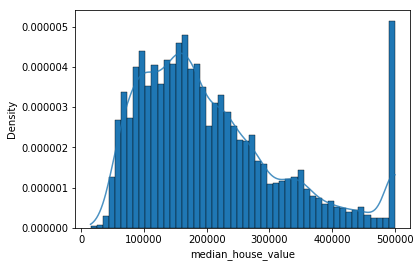

In [18]:
ax = sns.histplot(data=data["median_house_value"], bins=50, stat='density', alpha= 1, kde=True,
                   linewidth=0.4,line_kws=dict(color='black', alpha=0.8, linewidth=1.5, label='KDE'))

In [19]:
from sklearn.model_selection import train_test_split
X = feat_data_norm
Y = data["median_house_value"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Fitting a basic Linear Model taking entire Feature space

In [20]:
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1264.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:08:45   Log-Likelihood:            -2.0961e+05
No. Observations:               16512   AIC:                         4.193e+05
Df Residuals:                   16496   BIC:                         4.194e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.443e+05   1.06e+04     32.410      0.000    3.24e+05    3.65e+05
longitude                  -3.426e+05   1.32e+04    -26.037      0.000   -3.68e+05   -3.17e+05
latitude                   -3.176e+05   1.22e+04    -26.060      0.000   -3.42e+05   -2.94e+05
housing_median_age          5.073e+04   2876.252     17.637      0.000    4.51e+04    5.64e+04
total_rooms                 -835.5482   4.81e+04     -0.017      0.986   -9.51e+04    9.34e+04
total_bedrooms              2.993e+05   6.86e+04      4.366      0.000    1.65e+05    4.34e+05
population                 -1.672e+06   5.05e+04    -33.135      0.000   -1.77e+06   -1.57e+06
households                   6.15e+05    6.7e+04      9.179      0.000    4.84e+05    7.46e+05
median_income               1.909e+05   4509.200     42.338      0.000    1.82e+05       2e+05
total_rooms_per_house       2.851e+06   1.13e+05     25.174      0.000    2.63e+06    3.07e+06
total_bedrooms_per_house   -2.713e+06    1.4e+05    -19.331      0.000   -2.99e+06   -2.44e+06
population_per_house        3.767e+05    6.8e+04      5.539      0.000    2.43e+05     5.1e+05
ocean_proximity_INLAND     -5.525e+04   2234.697    -24.725      0.000   -5.96e+04   -5.09e+04
ocean_proximity_ISLAND       1.36e+05   3.95e+04      3.442      0.001    5.85e+04    2.13e+05
ocean_proximity_NEAR BAY   -5157.6823   2433.897     -2.119      0.034   -9928.382    -386.983
ocean_proximity_NEAR OCEAN -1515.3243   2022.605     -0.749      0.454   -5479.849    2449.200
==============================================================================
Omnibus:                     3842.837   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10192.858
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                       5.923   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Near Ocean Proximity has a very high p-value, hence it turns out to be insignificant

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


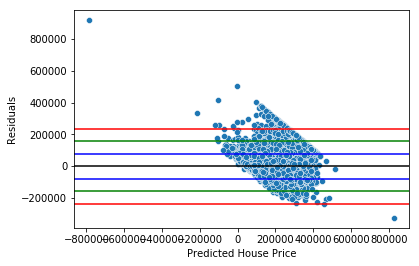

In [21]:
Y_pred = model.predict()
residuals = Y_train - Y_pred
std_res = np.std(residuals)
a = {-3:'r',
     -2: 'g',
     -1: 'b',
      0: 'k',
      1: 'b',
      2: 'g',
      3: 'r'}

sns.scatterplot(Y_pred, residuals)
plt.xlabel('Predicted House Price')
plt.ylabel('Residuals')

for i in a.keys():
    plt.axhline(i*std_res, color=a[i])

## Looks like there is a fair bit of heteroscedsticity 

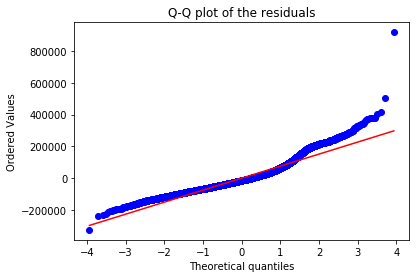

In [22]:
stats.probplot(residuals, dist='norm', plot=plt, fit=True)
plt.title("Q-Q plot of the residuals")
plt.show()

### Also the residual is not normal

## Checking Multicolinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(X_train)

,variables,VIF
0,longitude,13.261112
1,latitude,8.621968
2,housing_median_age,7.068149
3,total_rooms,45.780699
4,total_bedrooms,139.251145
5,population,17.480313
6,households,125.647916
7,median_income,10.484441
8,total_rooms_per_house,45.733706
9,total_bedrooms_per_house,35.341660


In [24]:
X_final_train = X_train
X_final_train = X_final_train.drop("total_bedrooms", axis=1)
calc_vif(X_final_train)

,variables,VIF
0,longitude,13.242613
1,latitude,8.614382
2,housing_median_age,7.033920
3,total_rooms,32.590552
4,population,16.407679
5,households,42.086875
6,median_income,10.356399
7,total_rooms_per_house,39.810573
8,total_bedrooms_per_house,26.322523
9,population_per_house,1.107925


In [25]:
X_final_train = X_final_train.drop("households", axis=1)
calc_vif(X_final_train)

,variables,VIF
0,longitude,12.542158
1,latitude,8.095860
2,housing_median_age,7.033591
3,total_rooms,13.347694
4,population,12.865137
5,median_income,10.349196
6,total_rooms_per_house,30.163589
7,total_bedrooms_per_house,22.410768
8,population_per_house,1.092366
9,ocean_proximity_INLAND,3.029466


In [26]:
X_final_train = X_final_train.drop("total_rooms_per_house", axis=1)
calc_vif(X_final_train)

,variables,VIF
0,longitude,12.268404
1,latitude,8.047113
2,housing_median_age,7.033387
3,total_rooms,12.445660
4,population,11.974271
5,median_income,6.752462
6,total_bedrooms_per_house,4.558840
7,population_per_house,1.089513
8,ocean_proximity_INLAND,2.925018
9,ocean_proximity_ISLAND,1.001338


In [27]:
X_final_train = X_final_train.drop("total_rooms", axis=1)
calc_vif(X_final_train)

,variables,VIF
0,longitude,12.039393
1,latitude,7.992851
2,housing_median_age,6.831321
3,population,2.796654
4,median_income,5.778209
5,total_bedrooms_per_house,4.406442
6,population_per_house,1.051568
7,ocean_proximity_INLAND,2.863841
8,ocean_proximity_ISLAND,1.001253
9,ocean_proximity_NEAR BAY,1.714553


In [28]:
X_final_train = X_final_train.drop("longitude", axis=1)
calc_vif(X_final_train)

,variables,VIF
0,latitude,4.404325
1,housing_median_age,3.838512
2,population,2.244154
3,median_income,3.991269
4,total_bedrooms_per_house,3.547864
5,population_per_house,1.051391
6,ocean_proximity_INLAND,2.254431
7,ocean_proximity_ISLAND,1.001246
8,ocean_proximity_NEAR BAY,1.675269
9,ocean_proximity_NEAR OCEAN,1.253020


In [29]:
model = sm.OLS(Y_train, sm.add_constant(X_final_train)).fit()
model.summary()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1401.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:08:47   Log-Likelihood:            -2.1085e+05
No. Observations:               16512   AIC:                         4.217e+05
Df Residuals:                   16501   BIC:                         4.218e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       7.606e+04   3549.579     21.427      0.000    6.91e+04     8.3e+04
latitude                     918.7272   3579.781      0.257      0.797   -6098.029    7935.483
housing_median_age          4.311e+04   3051.369     14.129      0.000    3.71e+04    4.91e+04
population                  -4.84e+04   2.21e+04     -2.189      0.029   -9.17e+04   -5069.398
median_income               2.943e+05   3581.761     82.169      0.000    2.87e+05    3.01e+05
total_bedrooms_per_house    3.805e+05   5.25e+04      7.249      0.000    2.78e+05    4.83e+05
population_per_house        -2.03e+05   7.13e+04     -2.846      0.004   -3.43e+05   -6.32e+04
ocean_proximity_INLAND     -8.302e+04   1824.275    -45.507      0.000   -8.66e+04   -7.94e+04
ocean_proximity_ISLAND      1.542e+05   4.25e+04      3.623      0.000    7.08e+04    2.38e+05
ocean_proximity_NEAR BAY    1.383e+04   2570.728      5.381      0.000    8794.101    1.89e+04
ocean_proximity_NEAR OCEAN  1.641e+04   2117.134      7.750      0.000    1.23e+04    2.06e+04
==============================================================================
Omnibus:                     4159.145   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9629.558
Skew:                           1.424   Prob(JB):                         0.00
Kurtosis:                       5.426   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Doing a Multi-Linear Regression using Lasso Regulariser

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso_model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Mean MAE: 58201.142 (1086.065)


In [31]:
print('R squared training set', round(lasso_model.score(X_train, Y_train)*100, 2))
print('R squared test set', round(lasso_model.score(X_test, Y_test)*100, 2))

R squared training set 53.47
R squared test set 52.28


### Tuning the Lasso Hyperparameters

In [32]:
from sklearn.linear_model import LassoCV

lasso_tuned_model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv , random_state = 0, max_iter=10000)

lasso_tuned_model.fit(X_train, Y_train) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\HP\Anaconda

LassoCV(alphas=array([0.  , 0.01, ..., 0.98, 0.99]), copy_X=True,
    cv=<sklearn.model_selection._split.RepeatedKFold object at 0x000001D411E80630>,
    eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=0, selection='cyclic', tol=0.0001, verbose=False)

In [33]:
lasso_tuned_model.alpha_

0.99

In [34]:
lasso_best_model = Lasso(alpha= lasso_tuned_model.alpha_)
lasso_best_model.fit(X_train, Y_train)

Lasso(alpha=0.99, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print('R squared training set', round(lasso_best_model.score(X_train, Y_train)*100, 2))
print('R squared test set', round(lasso_best_model.score(X_test, Y_test)*100, 2))

R squared training set 53.47
R squared test set 52.28


In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, lasso_best_model.predict(X_test))

58154.102285838

In [37]:
def findAdjustedR2(X, Y, model):
    adj_r2 =1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return adj_r2
print('Adjusted R squared train set', round((findAdjustedR2(X_train, Y_train, lasso_best_model))*100, 2))
print('Adjusted R squared test set', round((findAdjustedR2(X_test, Y_test, lasso_best_model))*100, 2))

Adjusted R squared train set 53.42
Adjusted R squared test set 52.11


## Fitting an Ensemble Model to better capture the Non Linearity

In [38]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
adaboost_regr.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=0)

In [39]:
adaboost_regr.score(X_train, Y_train)

0.39937025005937143

In [40]:
adaboost_regr.score(X_test, Y_test)

0.38782935959587805

In [41]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9617105716546399

In [42]:
regr.score(X_test, Y_test)

0.7849033227883602

In [43]:
regr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

## Performing Hyperparameter tuning by Grid Search

In [44]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [45]:

acc=[]
for i in range(10,110,10):
    g = RandomForestRegressor(n_estimators=i)
    g.fit(X_train, Y_train)
    acc.append(evaluate(g, X_test, Y_test))



Model Performance
Average Error: 35304.9248 .
Accuracy = 80.29%.
Model Performance
Average Error: 33789.4015 .
Accuracy = 80.97%.
Model Performance
Average Error: 33253.2476 .
Accuracy = 81.33%.
Model Performance
Average Error: 33117.2025 .
Accuracy = 81.33%.
Model Performance
Average Error: 33050.7234 .
Accuracy = 81.42%.
Model Performance
Average Error: 32822.1981 .
Accuracy = 81.56%.
Model Performance
Average Error: 32833.7962 .
Accuracy = 81.55%.
Model Performance
Average Error: 32837.1703 .
Accuracy = 81.54%.
Model Performance
Average Error: 32866.2001 .
Accuracy = 81.50%.
Model Performance
Average Error: 32727.5839 .
Accuracy = 81.62%.


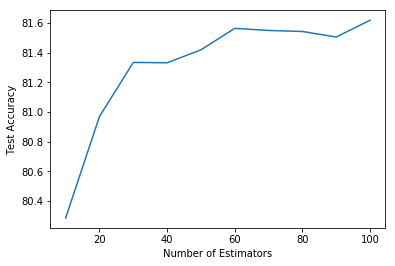

In [46]:
x =np.arange(10,110,10)
y = acc
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.plot(x,y)


In [47]:
acc2=[]
for i in range(2,22,2):
    g = RandomForestRegressor(max_depth=i)
    g.fit(X_train, Y_train)
    acc2.append(evaluate(g, X_test, Y_test))


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 64029.1589 .
Accuracy = 62.47%.
Model Performance
Average Error: 50886.4649 .
Accuracy = 70.92%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 44043.4185 .
Accuracy = 74.97%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 39458.3128 .
Accuracy = 77.63%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 36957.6391 .
Accuracy = 79.17%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 35666.5480 .
Accuracy = 79.90%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 34665.9041 .
Accuracy = 80.57%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 34340.5166 .
Accuracy = 80.64%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 34649.2478 .
Accuracy = 80.64%.


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance
Average Error: 34233.5229 .
Accuracy = 80.72%.


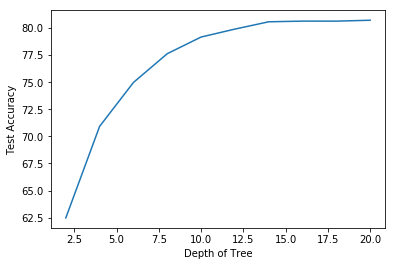

In [48]:
x = np.arange(2,22,2)
y = acc2
plt.plot(x,y)
plt.xlabel("Depth of Tree")
plt.ylabel("Test Accuracy")
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'n_estimators': np.arange(10,110,10),
    'max_depth': np.arange(2,22,2)
    
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, cv=3, n_jobs=-1, verbose=2)

In [50]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


{'max_depth': 20, 'n_estimators': 100}

In [51]:
evaluate(regr, X_train, Y_train)

Model Performance
Average Error: 13978.0040 .
Accuracy = 92.40%.


92.3999919983186

In [52]:
evaluate(regr, X_test, Y_test)

Model Performance
Average Error: 34830.1625 .
Accuracy = 80.67%.


80.67228285003219

In [53]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, Y_train)

Model Performance
Average Error: 13378.9952 .
Accuracy = 92.64%.


In [54]:
evaluate(best_grid, X_test, Y_test)

Model Performance
Average Error: 32796.4637 .
Accuracy = 81.60%.


81.59619836194283

In [55]:
print('Adjusted R squared train set', round((findAdjustedR2(X_train, Y_train, best_grid))*100, 2))
print('Adjusted R squared test set', round((findAdjustedR2(X_test, Y_test, best_grid))*100, 2))

Adjusted R squared train set 97.04
Adjusted R squared test set 80.44


In [56]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'total_rooms_per_house',
       'total_bedrooms_per_house', 'population_per_house',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [57]:
new_data = data.drop("median_house_value", axis=1)
d = new_data.iloc[2].values
d

array([-1.22240000e+02,  3.78500000e+01,  5.20000000e+01,  1.46700000e+03,
        1.90000000e+02,  4.96000000e+02,  1.77000000e+02,  7.25740000e+00,
        8.28813559e+00,  1.07344633e+00,  2.80225989e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00])

In [58]:
d = pd.DataFrame(np.reshape(d, (1,len(d))), columns = feat_data.columns)

In [59]:
feat_data_norm.iloc[2]

longitude                     0.210159
latitude                      0.564293
housing_median_age            1.000000
total_rooms                   0.037260
total_bedrooms                0.029330
population                    0.013818
households                    0.028943
median_income                 0.899633
total_rooms_per_house         0.052756
total_bedrooms_per_house      0.021940
population_per_house          0.001698
ocean_proximity_INLAND        0.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      1.000000
ocean_proximity_NEAR OCEAN    0.000000
Name: 2, dtype: float64

In [60]:
norm.transform(d)

array([[0.21015936, 0.5642933 , 1.        , 0.03726029, 0.02932961,
        0.01381765, 0.02894261, 0.89963256, 0.05275646, 0.02194011,
        0.00169796, 0.        , 0.        , 1.        , 0.        ]])

In [73]:
def predict_price(long, lat, age, room, bedroom, population, household, income, proximity):      
    X = [long, lat, age, room, bedroom, population, household, income, room/household, bedroom/household, population/household ]
    if proximity == "INLAND":
        X.extend([1,0,0,0])
    elif proximity == "ISLAND":
        X.extend([0,1,0,0])
    elif proximity == "NEAR BAY":
        X.extend([0,0,1,0])
    elif proximity == "NEAR OCEAN":
        X.extend([0,0,0,1])
    else:
        X.extend([0,0,0,0])
    X = np.array(X)
    X = pd.DataFrame(np.reshape(X, (1, len(X))), columns = feat_data.columns)
    X  = norm.transform(X)
    predicted_price = best_grid.predict(X)
    return predicted_price[0]

376903.13

In [75]:
import pickle
with open ('california_house_model.pickle', 'wb') as f:
    pickle.dump(best_grid, f)
    